### **Installing and importing necessary libraries**

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install cudf-cu11 dask-cudf-cu11 --extra-index-url=https://pypi.nvidia.com
!pip install cuml-cu11 --extra-index-url=https://pypi.nvidia.com
!pip install cugraph-cu11 --extra-index-url=https://pypi.nvidia.com
!pip install cupy-cuda11x -f https://pip.cupy.dev/aarch64

Restart runtime after running the previous cell

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

# Installing dependencies of the saved model

!pip install -r '/content/drive/MyDrive/requirements.txt'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing "dimensionality.py"- this is used for the BERTopic model
import pandas as pd
import re
import numpy as np
import os
import sys
import operator

sys.path.insert(0,'/content/drive/My Drive/')
#sys.path.append('/content/drive/My Drive/')
import dimensionality
import pre_processing
from dimensionality import *
from pre_processing import *

In [ ]:
# importing the train set
train_set =  pd.to_csv("/content/drive/MyDrive/cs_train_set.csv")
docs= train_set['abstract'].tolist()

#Loading the model
topic_model=BERTopic.load('/content/drive/MyDrive/24_topics_model')

## **Computer Science Themes in Boom and Bust Phases**

Recessions and contractions happened in the periods; 1st-Jan-2008 to 31st-Dec-2009 and 1st-Jan-2020 to 31st-Dec-2020

Expansions occurred in January 2010- December 2010, and January 2021- June 2021. We can also see a more stable economy in January 2005 – December 5, 2007, December 2010 – December 2019, and July 2021- March 2023. There is a significant financial peak in the second quarter of 2021 (April, May, and June 2021)
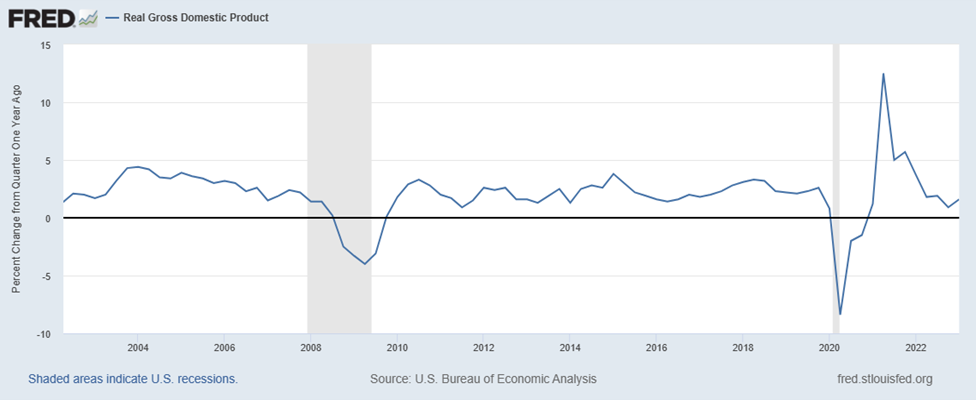


(U.S. Bureau of Economic Analysis, 2023).

In [ ]:
#Getting the abstract and corresponding topic of each instance of the trainset
doc_topics= topic_model.get_document_info(docs)

#Adding the date column
doc_topics = pd.concat([train_set['year'],doc_topics], axis= 1)
doc_topics.head()

In [ ]:
# creating a separate dataframe for the boom phases
booms = boom_phases(doc_topics, 'year')
booms.head()

In [ ]:
#a separate dataframe for the bust phases
busts = bust_phase(doc_topics, 'year')
busts.head()

In [ ]:
# Getting a frequency distribution of each theme in both phases
import nltk
nltk.download('punkt')
from nltk import FreqDist
import matplotlib.pyplot as plt
boom_topics = booms['CustomName'].tolist()
boom_topic_dist= FreqDist(boom_topics)
bm = {k: v for k, v in sorted(boom_topic_dist.items(), key=lambda item: item[1])}

In [ ]:
busts_topics = busts['CustomName'].tolist()
busts_topic_dist= FreqDist(busts_topics)
bs = {k: v for k, v in sorted(busts_topic_dist.items(), key=lambda item: item[1])}

In [ ]:
# Finding the percentage of each theme
total_boom_docs= sum(bm.values())
boom_topics_proportions = {k:(v/total_boom_docs)*100 for k,v in bm.items()}
total_bust_docs= sum(bs.values())
busts_topics_proportions = {k:(v/total_bust_docs)*100 for k,v in bs.items()}

busts_topic_df= pd.DataFrame(busts_topics_proportions.items())
boom_topic_df= pd.DataFrame(boom_topics_proportions.items())
boombust_topic_df= boom_topic_df.merge(busts_topic_df, how= 'left', on = 0)

In [ ]:
#Renaming the columns
boombust_topic_df = boombust_topic_df.rename(columns={0: 'topic', '1_x':'boom', '1_y':'bust'})

#Removing 'other' theme
boombust_topic_df= boombust_topic_df[(boombust_topic_df.topic != 'other')].reset_index(drop=True)
boombust_topic_df.to_csv('/content/drive/MyDrive/boombust_topic_df.csv')

<Axes: title={'center': 'Boom and Bust Topics'}, ylabel='topic'>

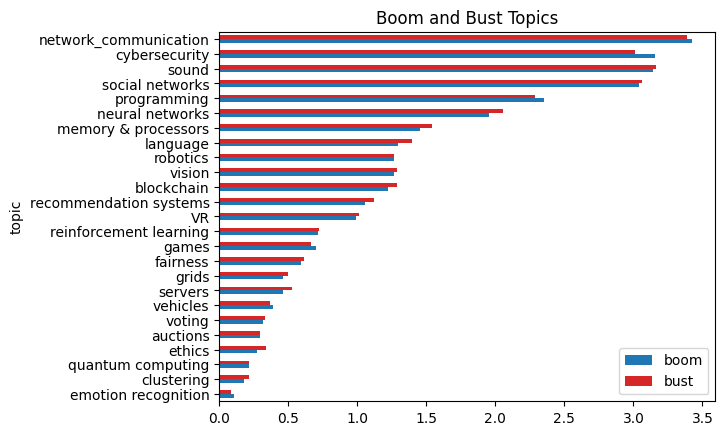

In [ ]:
#plots
boombust_topic_df.plot(x='topic',
        kind='barh',
        stacked=False,
        title='Boom and Bust Topics', color=['tab:blue','tab:red'])